**ANOVA Test**

We will perform ANOVA test to see if the revenue from the various payment methods(Mailed Check, Credit Card, Bank Withdrawl) used by customers are any significantly different.

In [ ]:
import pandas as pd
churn = pd.read_csv('/content/updated_dataset.csv')
churn.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225.0,34.827662,-118.999073,2.0,...,Credit Card,65.6,593.30,0.00,0.0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206.0,34.162515,-118.203869,0.0,...,Credit Card,-4.0,542.40,38.33,10.0,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627.0,33.645672,-117.922613,0.0,...,Bank Withdrawal,73.9,280.85,0.00,0.0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553.0,38.014457,-122.115432,1.0,...,Bank Withdrawal,98.0,1237.85,0.00,0.0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010.0,34.227846,-119.079903,3.0,...,Credit Card,83.9,267.40,0.00,0.0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [ ]:
Credit = churn[churn['Payment Method'] == 'Credit Card']['Total Revenue'].to_list()
Withdrawl = churn[churn['Payment Method'] == 'Bank Withdrawal']['Total Revenue'].to_list()
Mailed = churn[churn['Payment Method'] == 'Mailed Check']['Total Revenue'].to_list()

In [ ]:
from scipy.stats import f_oneway

stat, p = f_oneway(Credit, Withdrawl, Mailed)
if p > 0.05:
	print('Accept the Null Hypothesis. Theres no significant difference among the groups.')
else:
	print('Accept the Alternative Hypothesis. Theres a significant difference among the groups.')


print('stat=%.3f, p=%.3f' % (stat, p))

Accept the Alternative Hypothesis. Theres a significant difference among the groups.
stat=60.192, p=0.000


**Tukey Test**

  We will perform a Tukey Test to detemine which payment method group means are significantly different from each other.

In [ ]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print('\nTukey HSD:')
data = pd.DataFrame({'vals': churn['Total Revenue'].dropna(), 'group': churn['Payment Method'].dropna()})
tukey = pairwise_tukeyhsd(endog=data['vals'], groups=data['group'], alpha=0.05)
print(tukey)


Tukey HSD:
           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
     group1        group2     meandiff  p-adj   lower      upper    reject
--------------------------------------------------------------------------
Bank Withdrawal  Credit Card   -296.072 0.001  -490.1666  -101.9775   True
Bank Withdrawal Mailed Check -1912.5583   0.0 -2325.1138 -1500.0027   True
    Credit Card Mailed Check -1616.4862   0.0 -2037.1271 -1195.8453   True
--------------------------------------------------------------------------


In summary, there are significant differences in mean Total Revenue between all pairs of payment method groups.

**Correlation Heatmap**

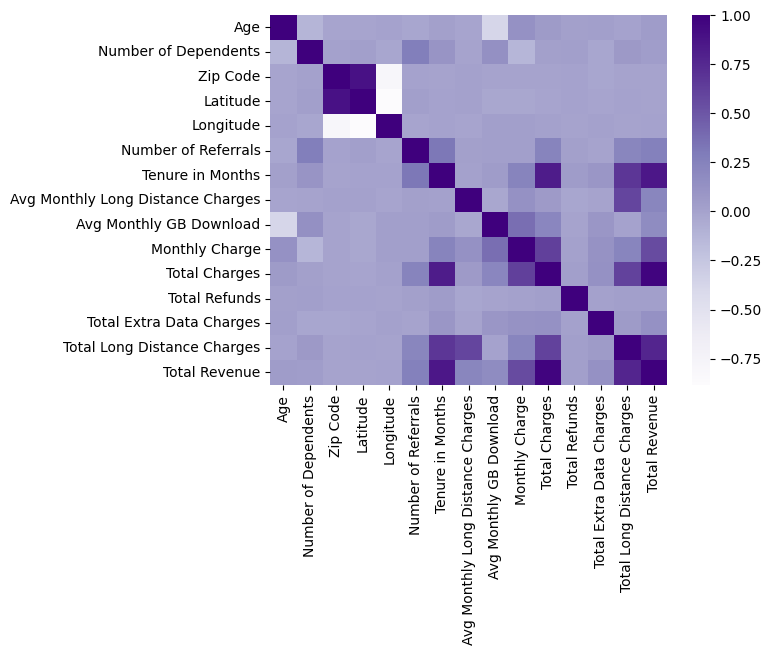

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_columns = churn.select_dtypes(include=['float64', 'int64'])

sns.heatmap(numeric_columns.corr(), cmap='Purples')
plt.show()


Correlated Columns :

*   Total Revenue and Total Long Distance charges : It can be concluded that long distance calls have considerable contributions to the company revenue.
*   Total Charges and Tenure in Months : More package usages means more income to the company.
*   Number of Refferals and Total Revenue : They also seem to have a bit of a contribution to the total revenue.
*   Monthly Charge and Total Revenue: There is also a signinficant impact of monthly charges on total revenue.
*   Number of Referrals and # of dependants : It's natural that there will be more recommendations when there are dependant people.










<ipython-input-28-8e4e731982d1>:9: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  ax = sns.histplot(x = churn[n], hue = churn['Customer Status'], palette = ['#676FA3', '#FF5959'], bins = 40)
<ipython-input-28-8e4e731982d1>:9: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  ax = sns.histplot(x = churn[n], hue = churn['Customer Status'], palette = ['#676FA3', '#FF5959'], bins = 40)
<ipython-input-28-8e4e731982d1>:9: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  ax = sns.histplot(x = churn[n], hue = churn['Customer Status'], palette = ['#676FA3', '#FF5959'], bins = 40)
<ipython-input-28-8e4e731982d1>:9: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  ax = sns.histplot

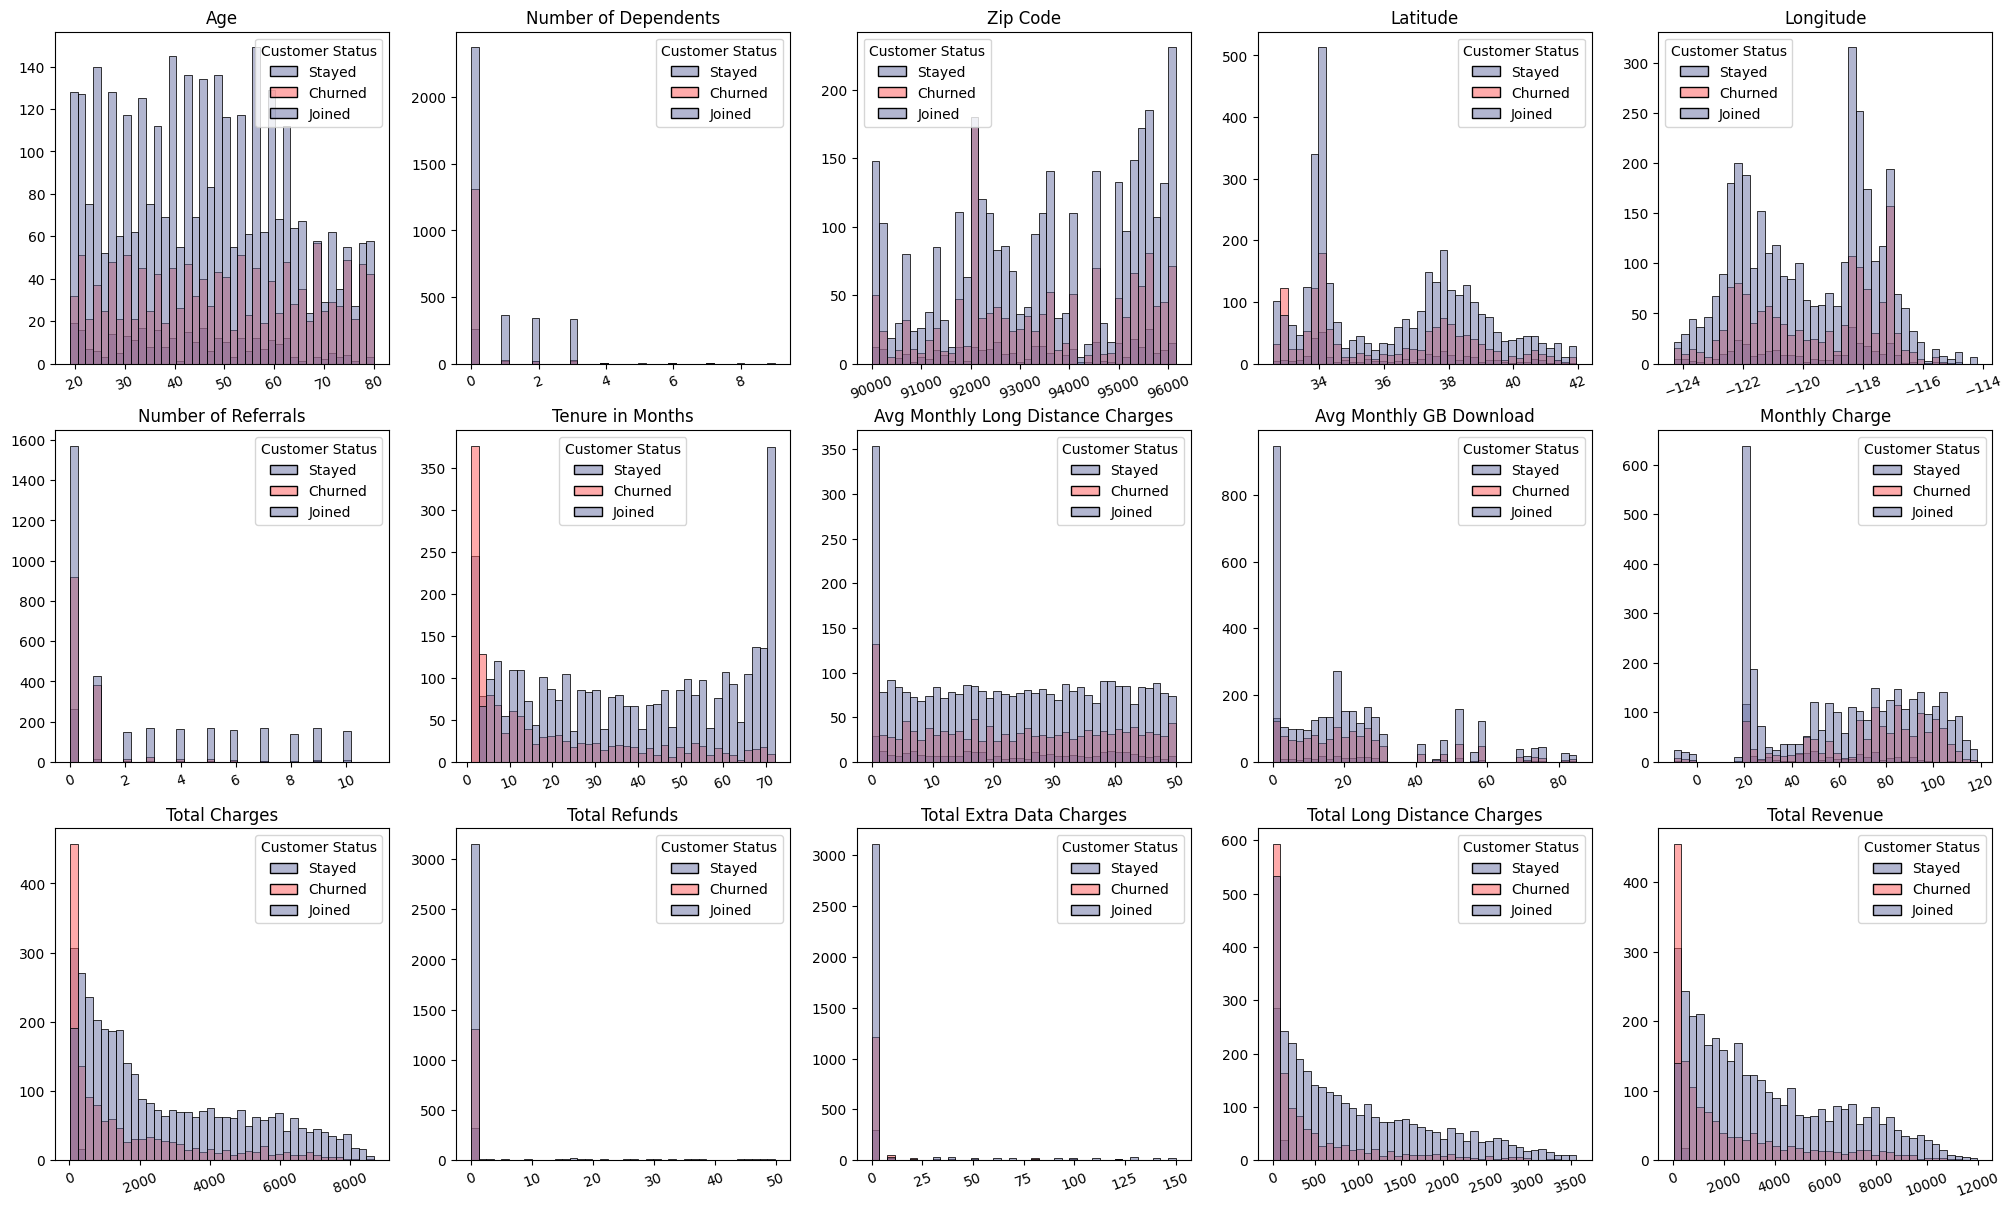

In [ ]:
num = [cname for cname in churn.columns if churn[cname].dtype in ['int64', 'float64']]
dfc_num = churn[num]

fig = plt.figure(figsize = (25, 25))

i = 1
for n in dfc_num.columns:
    plt.subplot(5, 5, i)
    ax = sns.histplot(x = churn[n], hue = churn['Customer Status'], palette = ['#676FA3', '#FF5959'], bins = 40)
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(n), loc = 'center')
    plt.xticks(rotation = 20, fontsize = 10)
    i += 1

 Customer churn rate is greatest in the first few months of subscribing to the service.
 And In relation to their small duration of subscription, total amount charged to churned customers are comparitively low to those who stayed, hence, lower revenue.